# General crime increased throughout summer 2014 in San Francisco

Based on data provided by San Francisco Data Portal, general crime has been increasing during Summer 2014. The crimes are perpetrated mostly on the weekends, in the evenings, and the most dangerous region is the Southern district. 

Larceny/theft also increased throughout summer 2014 and had the same overall features as general crime.

*Read in the data to a Pandas DataFrame and print the first 10 rows*

In [100]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import csv as csv
import matplotlib


In [78]:
df = pd.read_csv('sanfrancisco_incidents_summer_2014.csv', sep=',', header=0)

In [7]:
df[:10]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000
5,140734349,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434916010
6,140734349,DRUG/NARCOTIC,POSSESSION OF CONTROLLED SUBSTANCE FOR SALE,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434916662
7,140734349,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434965050
8,140738147,OTHER OFFENSES,EVADING A POLICE OFFICER RECKLESSLY,Sunday,08/31/2014,23:00,INGLESIDE,NONE,1400 Block of DOLORES ST,-122.424498,37.746649,"(37.7466488718366, -122.424497944857)",14073814727175
9,140734258,TRESPASS,TRESPASSING,Sunday,08/31/2014,23:00,CENTRAL,"ARREST, CITED",900 Block of MASON ST,-122.410846,37.792316,"(37.7923158747647, -122.410845624227)",14073425827195


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28993 entries, 0 to 28992
Data columns (total 13 columns):
IncidntNum    28993 non-null int64
Category      28993 non-null object
Descript      28993 non-null object
DayOfWeek     28993 non-null object
Date          28993 non-null object
Time          28993 non-null object
PdDistrict    28993 non-null object
Resolution    28993 non-null object
Address       28993 non-null object
X             28993 non-null float64
Y             28993 non-null float64
Location      28993 non-null object
PdId          28993 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 2.9+ MB


# Explore the Data

*Larceny/theft is the most commited crime in the city.* 

In [9]:
df['Category'].value_counts()

LARCENY/THEFT                  9466
OTHER OFFENSES                 3567
NON-CRIMINAL                   3023
ASSAULT                        2882
VEHICLE THEFT                  1966
WARRANTS                       1782
DRUG/NARCOTIC                  1345
SUSPICIOUS OCC                 1300
MISSING PERSON                 1266
SECONDARY CODES                 442
WEAPON LAWS                     354
ROBBERY                         308
TRESPASS                        281
FRAUD                           242
DRUNKENNESS                     147
KIDNAPPING                      117
PROSTITUTION                    112
DRIVING UNDER THE INFLUENCE     100
ARSON                            63
RUNAWAY                          61
LIQUOR LAWS                      42
DISORDERLY CONDUCT               31
FORGERY/COUNTERFEITING           18
VANDALISM                        17
SUICIDE                          14
FAMILY OFFENSES                  10
EMBEZZLEMENT                     10
STOLEN PROPERTY             

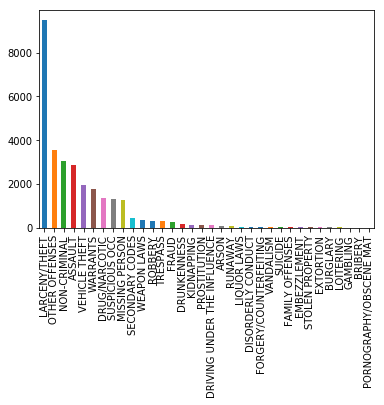

In [13]:
df['Category'].value_counts().plot(kind='bar')

*Southern District has the most crime reported.*

In [16]:
df['PdDistrict'].value_counts()

SOUTHERN      5739
MISSION       3700
NORTHERN      3589
CENTRAL       3513
BAYVIEW       2725
INGLESIDE     2378
TENDERLOIN    2257
TARAVAL       1853
PARK          1693
RICHMOND      1546
Name: PdDistrict, dtype: int64

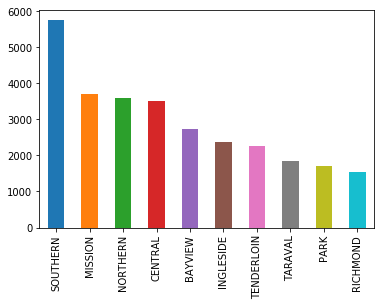

In [17]:
df['PdDistrict'].value_counts().plot(kind='bar')

*Perform date and time analysis for larceny/theft*

In [79]:
# Translate to common DateTime for future analysis and plotting
df["Date"] = pd.to_datetime(df["Date"])
category_larceny = df[df['Category']=='LARCENY/THEFT']
#category_larceny[:10]

In [29]:
category_larceny_perdate = category_larceny['Date'].value_counts()
#category_larceny_perdate

*The graphic below shows the number of larceny per day. It is noted that the number of crimes  has been increasing in the last 3 months.*

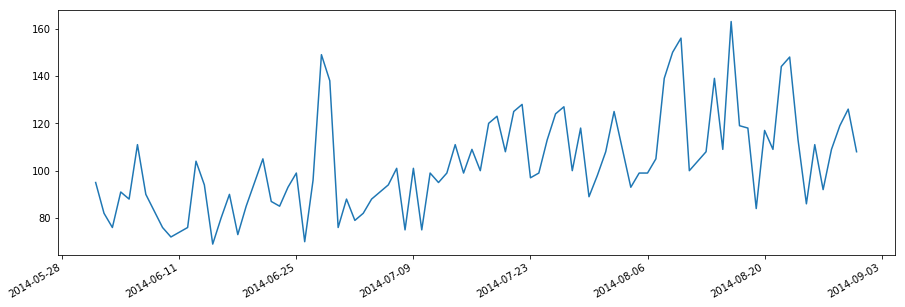

In [30]:
category_larceny_perdate.plot(figsize=(15,5))

In [45]:
thefts_permonth= category_larceny_perdate.groupby([lambda x: x.month])

The statistics below confirm the tendency. The mean of larcenies has raised from 90.07 in June to 117.72 in August and the max number of crimes per month raised from 149 in June to 163 in August. While the max crimes committed in one day decreased for the month of July, the mean, the min, and the 25%, 50%, and 75% quartiles all increased each month of the summer. This indicates outliers of high crime that vary across the summer, with the general trend being increased larceny each month of the summer.

In [46]:
thefts_permonth.describe()

,count,mean,std,min,25%,50%,75%,max
6,30.0,90.066667,18.203701,69.0,76.0,87.5,95.0,149.0
7,31.0,101.774194,15.154119,75.0,92.5,99.0,112.0,128.0
8,31.0,116.419355,20.477263,84.0,104.5,109.0,125.5,163.0


In [47]:
category_larceny_pertime = category_larceny['Time'].value_counts()
#category_larceny_pertime

*Thefts are commited mostly in the evening.*

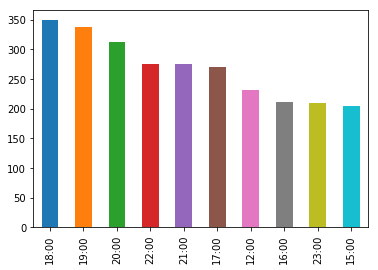

In [48]:
category_larceny_pertime[:10].plot(kind='bar')

In [49]:
category_larceny_perdayOfweek = category_larceny['DayOfWeek'].value_counts()
#category_larceny_perdayOfweek

*Thefts are more frequent on weekends.*

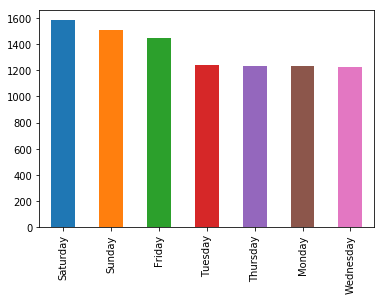

In [50]:
category_larceny_perdayOfweek.plot(kind = 'bar')

*Now let's do the same date and time analysis for crime in general.*

In [43]:
df_perdate = df['Date'].value_counts()
#df_perdate

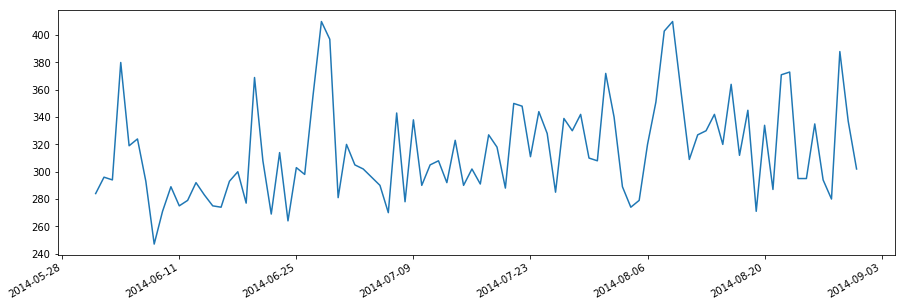

In [41]:
df_perdate.plot(figsize=(15,5))

In [51]:
crimes_permonth= df_perdate.groupby([lambda x: x.month])

In [52]:
crimes_permonth.describe()

,count,mean,std,min,25%,50%,75%,max
6,30.0,303.800000,40.097639,247.0,277.5,293.0,312.5,410.0
7,31.0,311.967742,22.483303,270.0,291.5,308.0,329.0,350.0
8,31.0,329.290323,38.349440,271.0,295.0,330.0,355.0,410.0


Again, we see that the mean, min, 25%, 50%, and 75% for crimes/day increases each month of the summer, while there remain outliers of high crime days in June.
*Crime in general also increases throughout the summer.*
Let's see if the other theft trends hold the same (evenings and weekends).

In [80]:
df["Time"] = pd.to_datetime(df["Time"])

In [82]:
#df["Time"]

In [83]:
df["Time"] = df["Time"].dt.time

In [85]:
#df["Time"]

In [91]:
df_pertime = df['Time'].value_counts()
#df_pertime

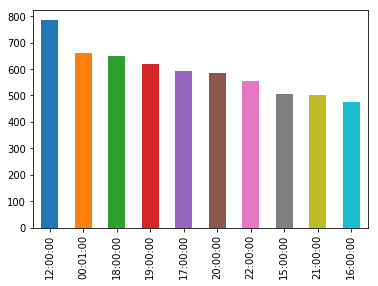

In [94]:
df_pertime[:10].plot(kind='bar')

Here we see a slight variation from thefts. General crimes are most likely to be committed at noon. In aggregate, they are probably still most likely in the evenings, as evening times (between 5pm and early AM) comprise 7 of the top 10 crime times.

In [96]:
df_perdayOfweek = df['DayOfWeek'].value_counts()
#df_perdayOfweek

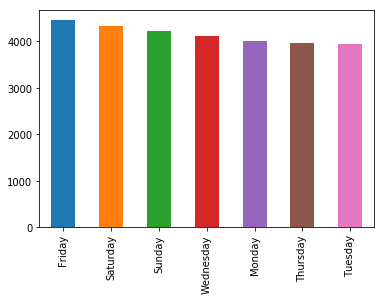

In [98]:
df_perdayOfweek.plot(kind = 'bar')

General crime is also most common on the weekends (Friday, Saturday, and Sunday).